In [1]:
library(ggplot2)
library(ggtree)
library(sitePath)

METADATA <- "Metadata"
REFSEQ_DIR <- "RefSeq"

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
- Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36. doi:10.1111/2041-210X.12628





In [2]:
siteMapping <- read.csv(file.path(REFSEQ_DIR, "SARS_CoV_2.csv"), row.names = 1)

In [3]:
metadata <- read.csv(file.path(METADATA, "SARS_CoV_2.csv"), row.names = 1)

In [2]:
minEntropy <- readRDS("SARS-CoV-2.rds")

In [3]:
minEntropy

This is a 'sitesMinEntropy' object. 

In [7]:
paths <- attr(minEntropy, "paths")

In [8]:
snp <- SNPsites(paths)

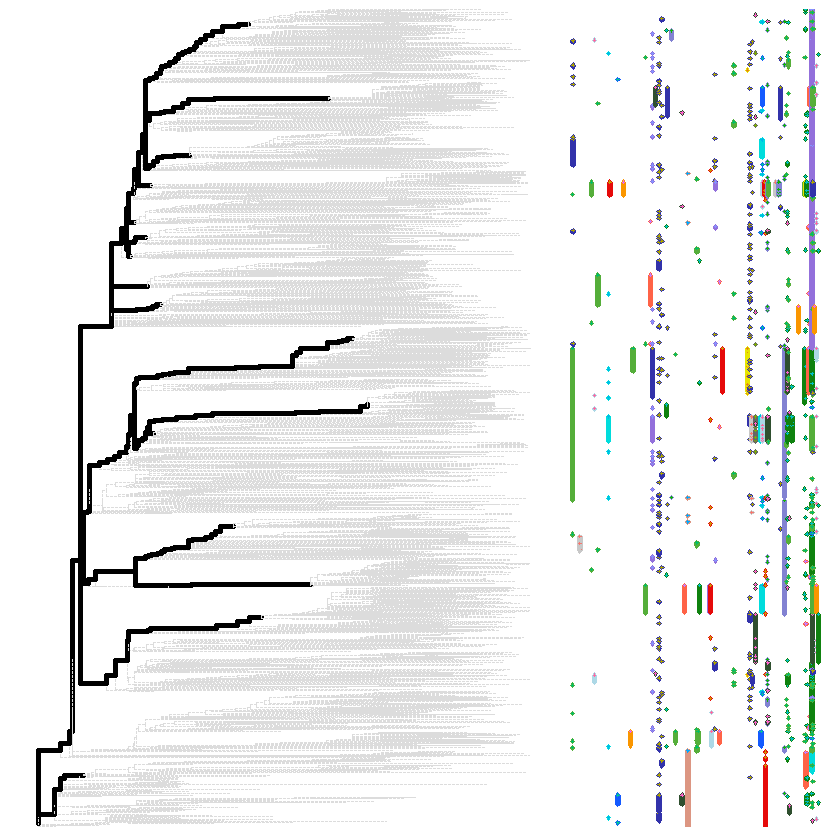

In [9]:
plotMutSites(snp)

In [3]:
fixedSites <- fixationSites(minEntropy)
attr(fixedSites, "clustersByPath") <- sitePath:::.assignClusterNames(attr(fixedSites, "clustersByPath"))

Warning message:
"`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


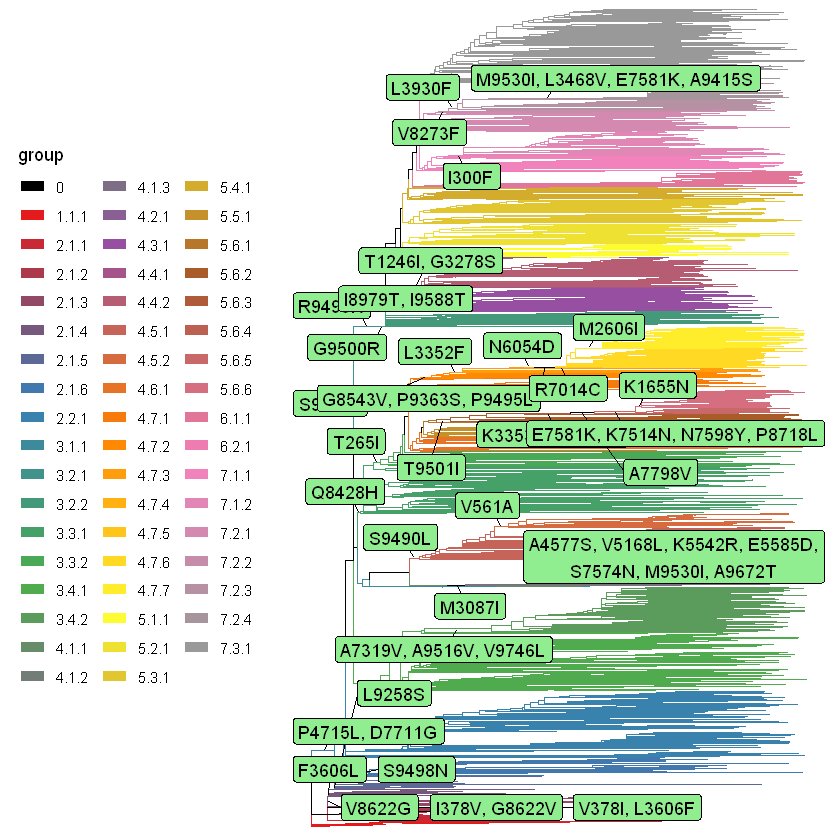

In [5]:
plot(fixedSites)

In [ ]:
# ggtree(as.phylo(fixedSites), layout = "daylight")

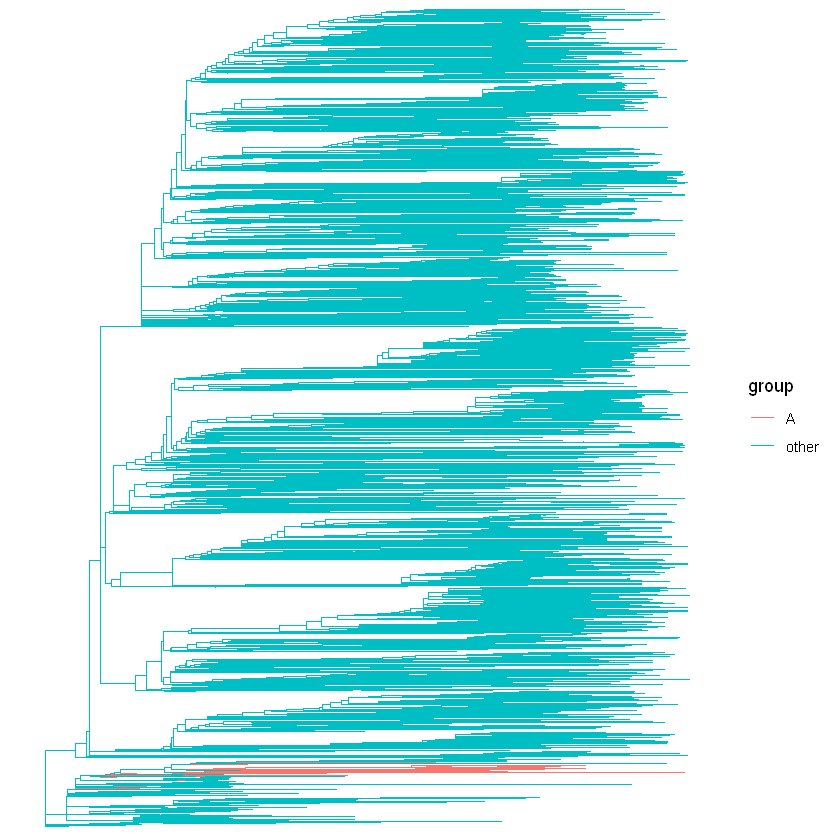

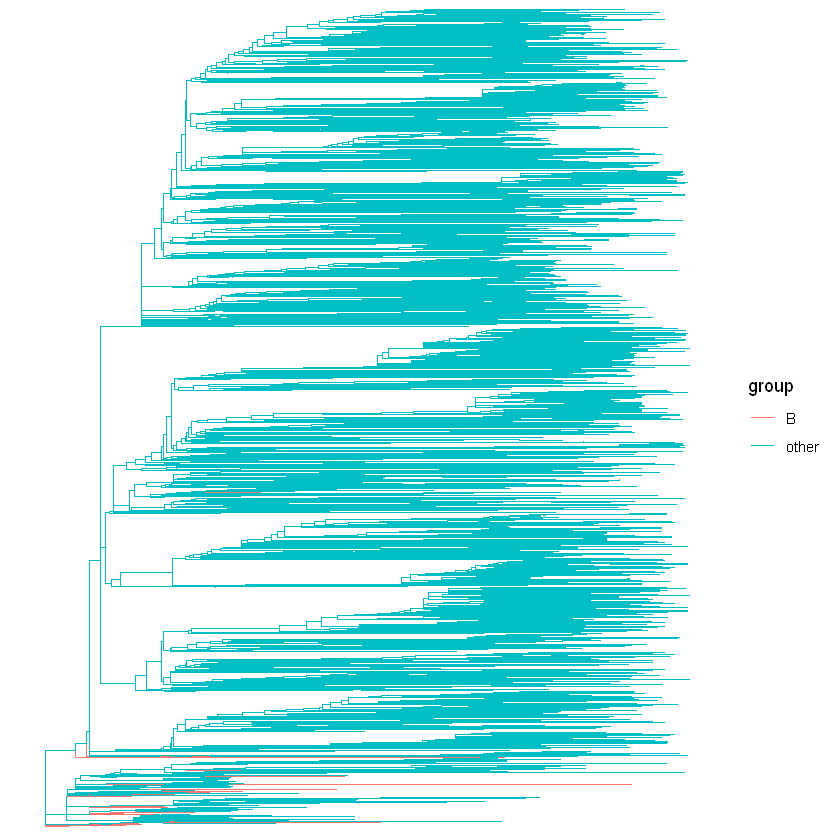

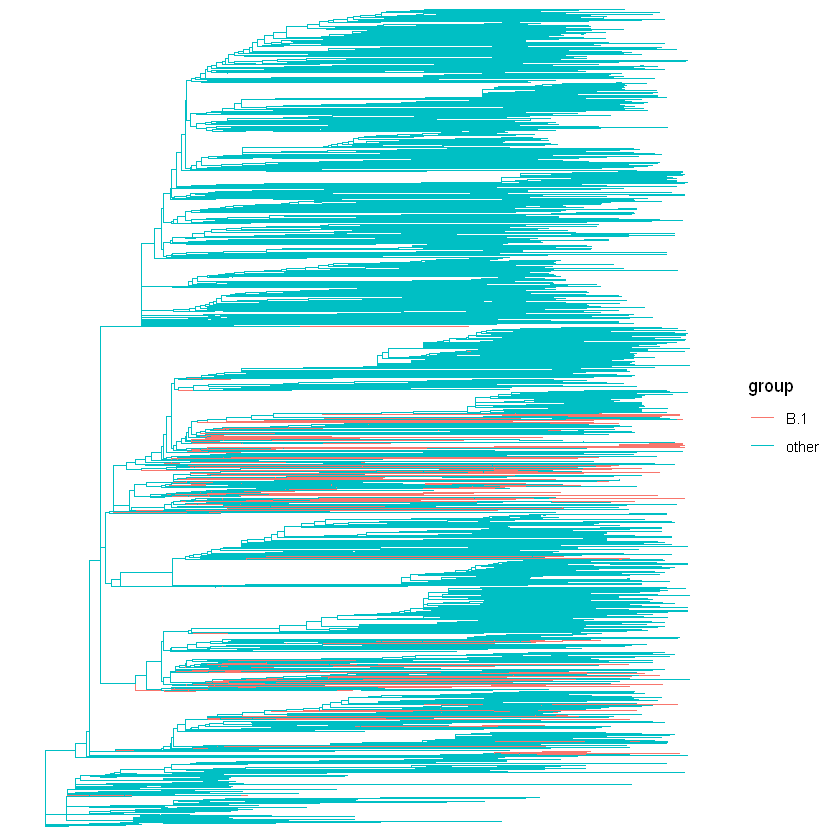

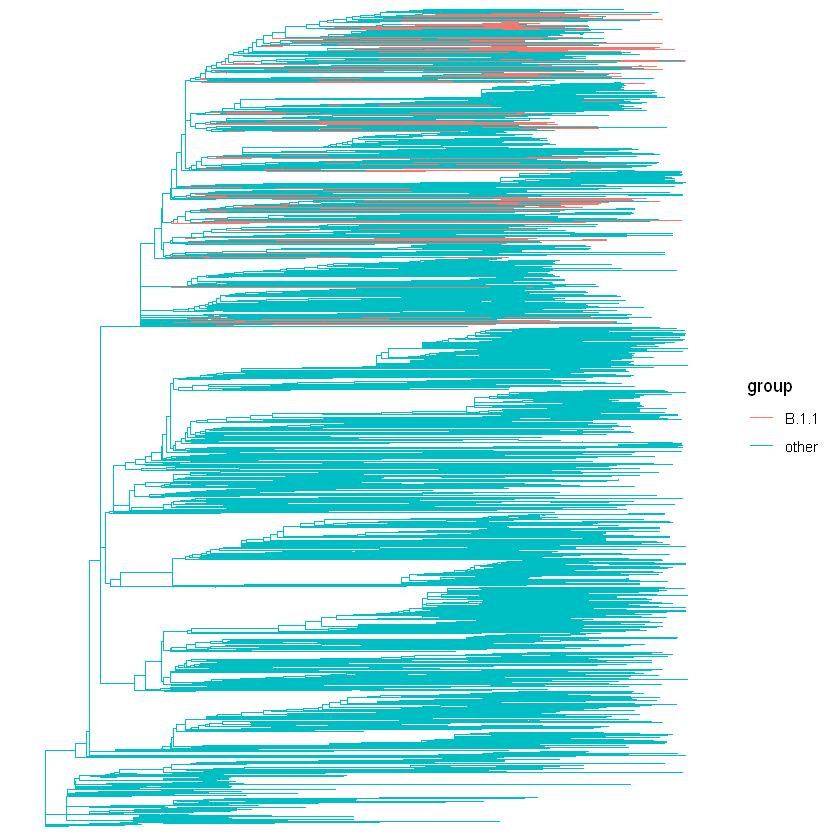

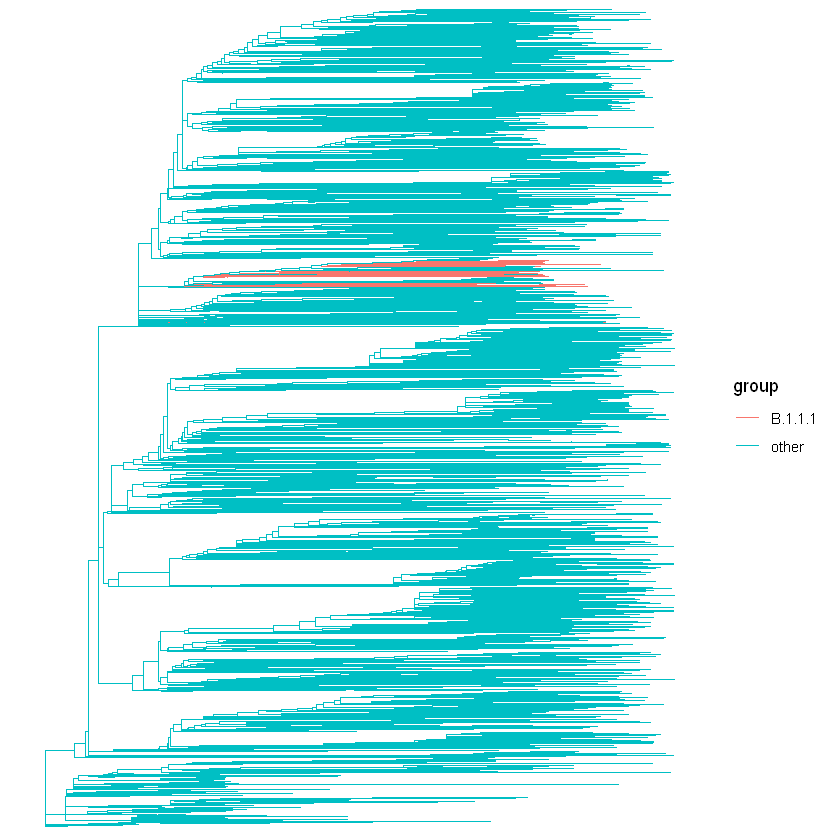

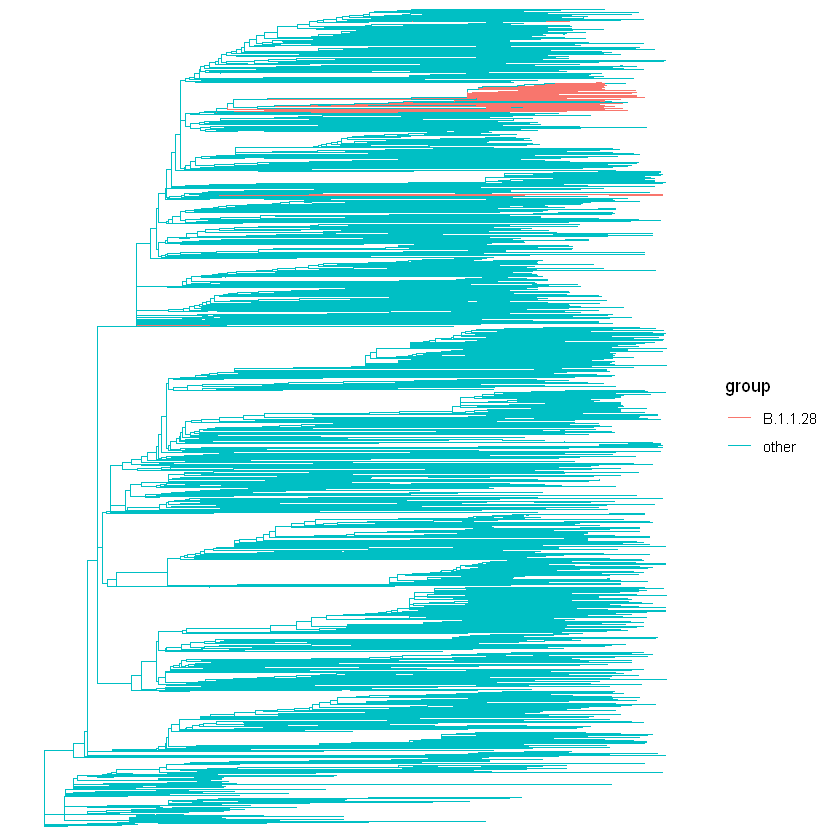

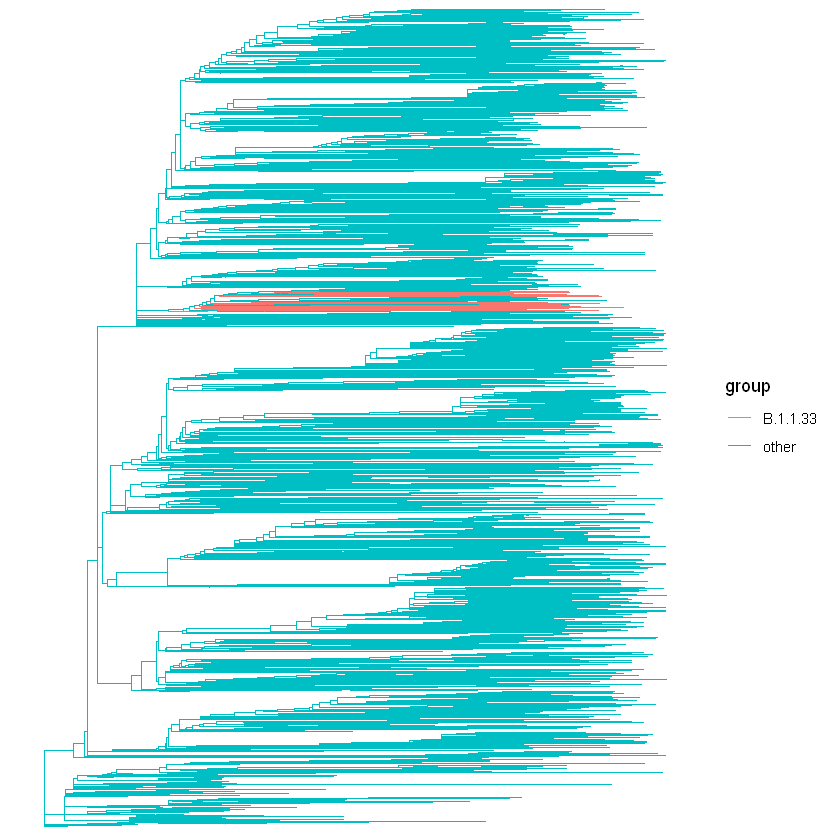

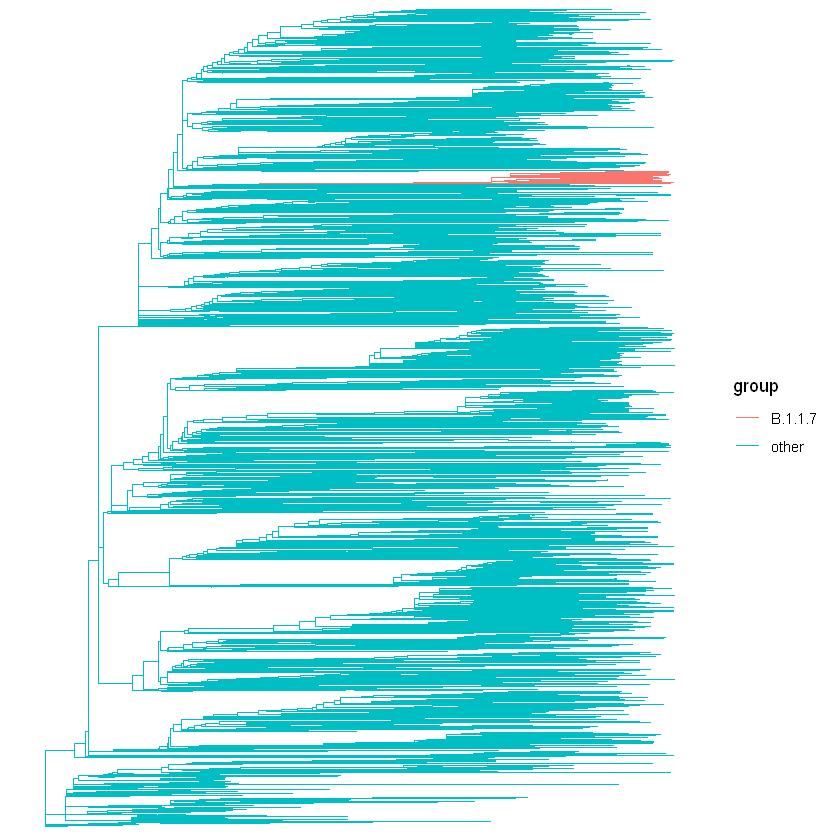

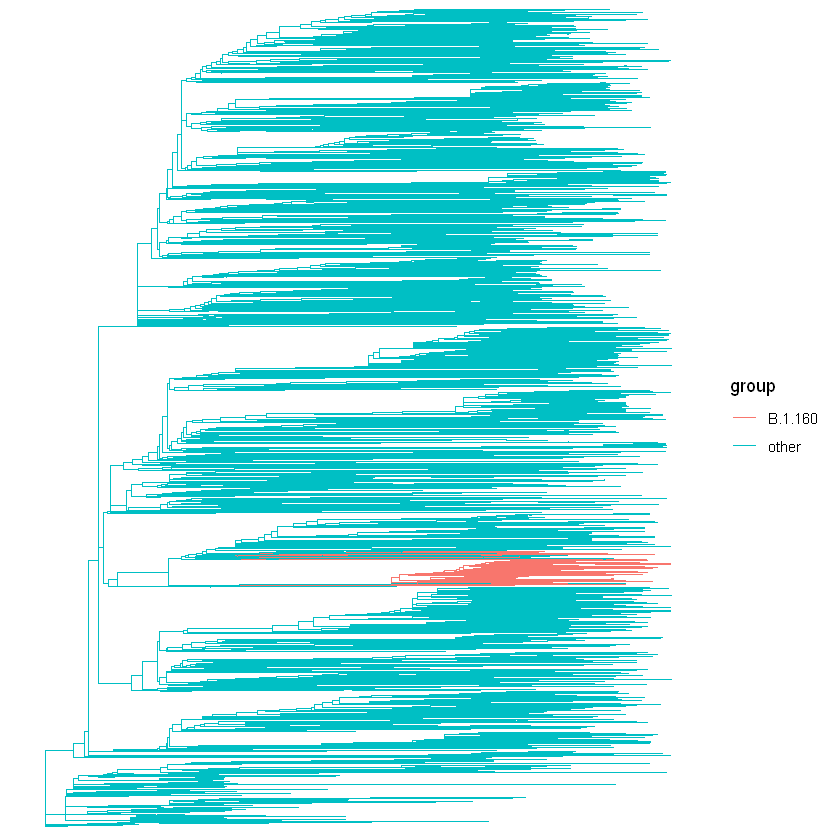

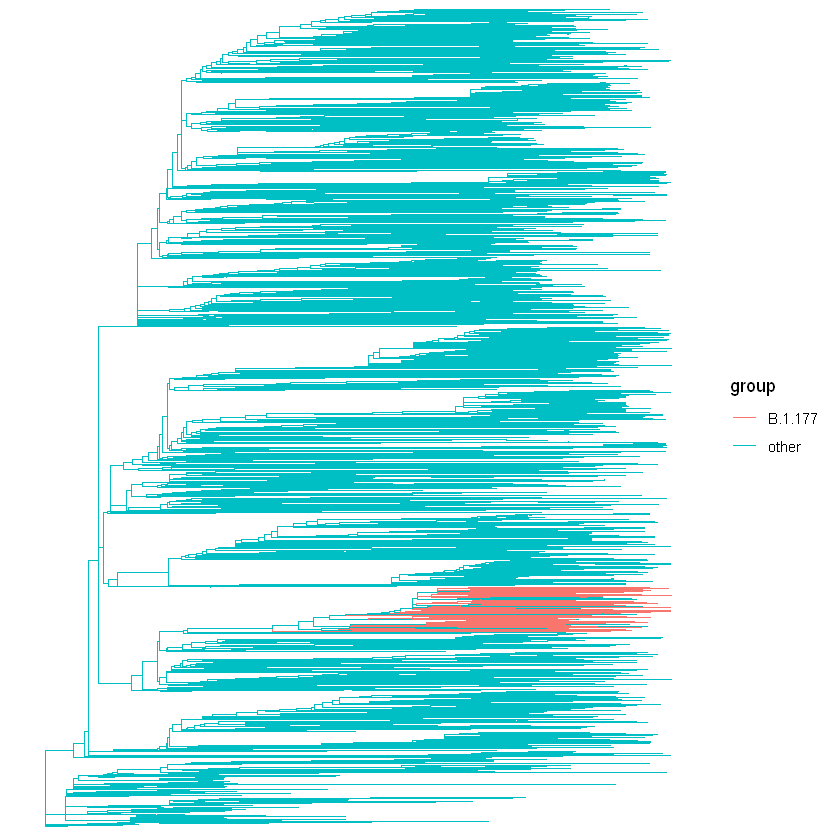

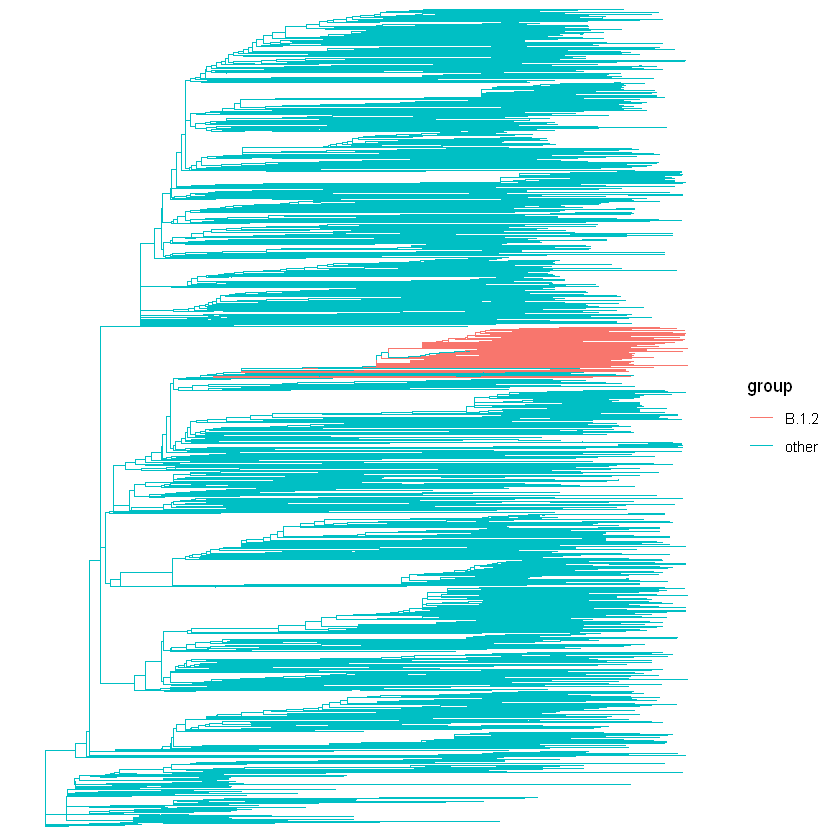

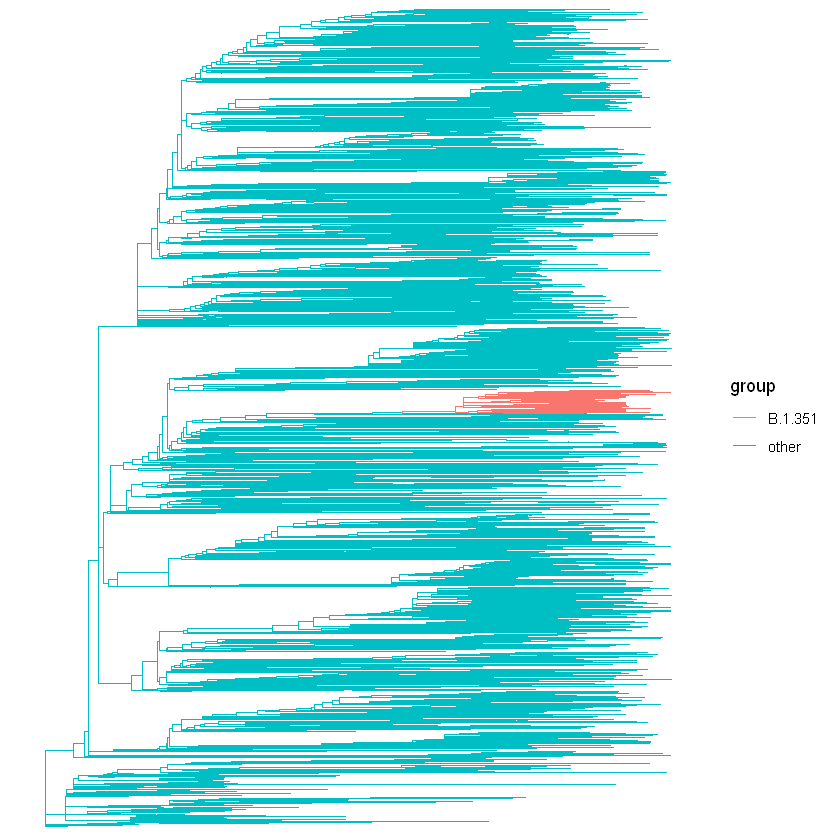

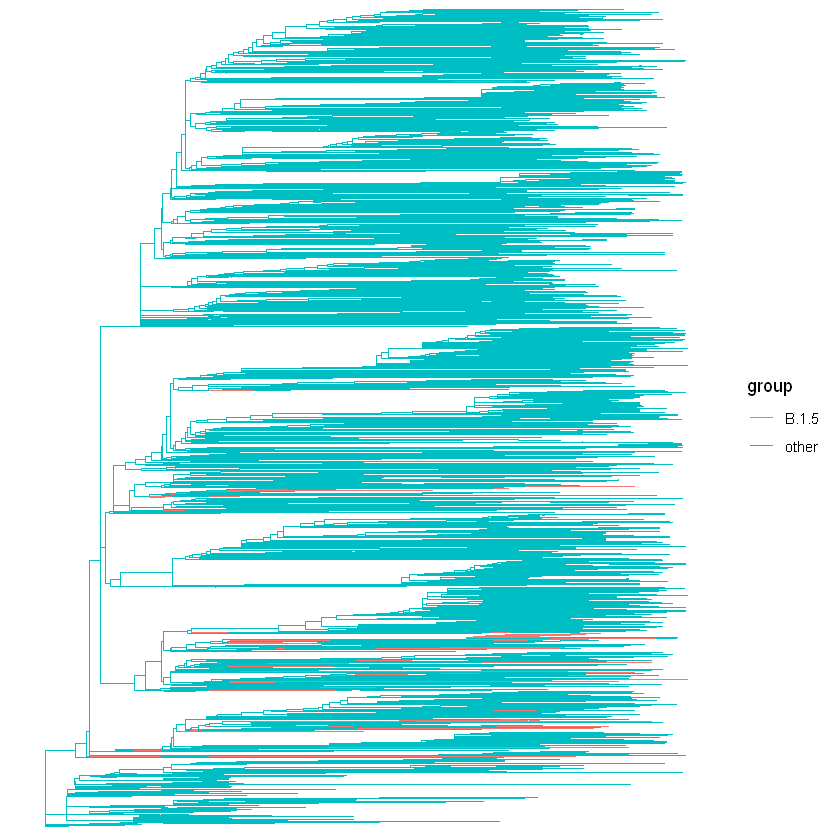

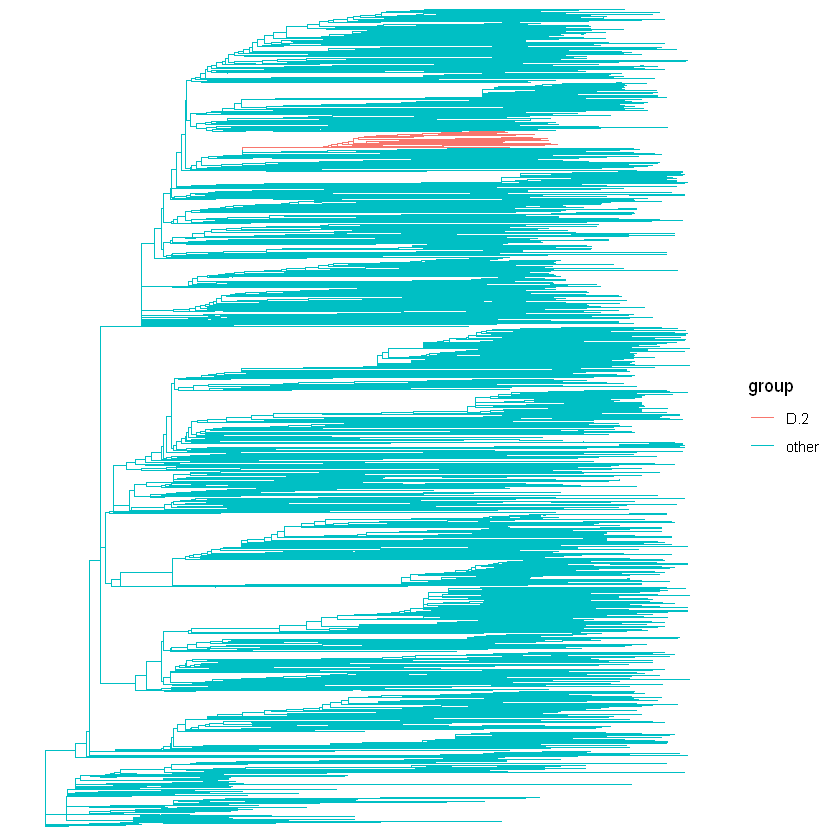

In [8]:
tree <- as.phylo(fixedSites)

tipClade <- metadata[tree[['tip.label']], ]
tipClade <- split(row.names(tipClade), tipClade[["pangolin_lineage"]])

for (cladeName in names(tipClade)) {
    clade <- list()
    tips <- tipClade[[cladeName]]
    if (length(tips) > 60) {
        clade[[cladeName]] <- tips
        clade[["other"]] <- setdiff(tree[["tip.label"]], tips)
        clade_tree <- groupOTU(tree, clade)
        print(ggtree(clade_tree, aes(color = group)))
    }
}